In [16]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [17]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import pandas as pd

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



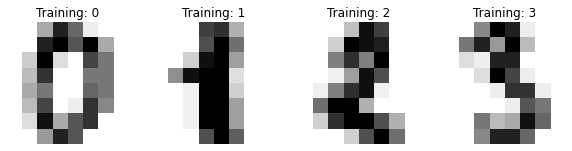

In [18]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [19]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
from sklearn.metrics import accuracy_score

gammas = [0.01, 0.005, 0.001, 0.0005, 0.0001]
Cs =  [0.1, 0.2, 0.5, 0.7, 1, 2, 5, 7, 10]

---Digits--


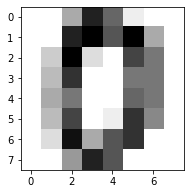

64


In [20]:
digits = datasets.load_digits()
data = digits.images.reshape((n_samples, -1))
print("---Digits--")
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
print(digits.images[0].size)



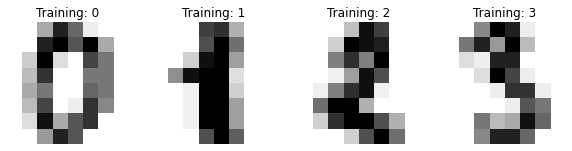

In [21]:
#PART:Sanity check visualization of the data
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [22]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

train_frac = 0.1
test_frac = 0.1
dev_frac = 0.1

X_train, X_dev_test, y_train, y_dev_test = train_test_split(
    data, digits.target, test_size=1-train_frac, shuffle=True
)

X_test,X_dev, y_test,y_dev = train_test_split(
    X_dev_test, y_dev_test, test_size=(dev_frac)/(1-train_frac), shuffle=True
)


In [23]:
df =pd.DataFrame()

pg = []
pc =[]
acc =[]

for gamma in gammas:
    for c in Cs:
        # Create a classifier: a support vector classifier
        clf = svm.SVC(gamma=gamma, C=c)
        
        # Learn the digits on the train subset
        clf.fit(X_train, y_train)

        # Predict the value of the digit on the test subset
        predicted = clf.predict(X_dev)
        
        score = accuracy_score(y_pred=predicted,y_true=y_dev)
        
        pg.append(gamma)
        pc.append(c)
        acc.append(score)
        
        
df['Gamma'] = pg
df['C']= pc
df['Accuracy'] = acc

df

,Gamma,C,Accuracy
0,0.0100,0.1,0.066667
1,0.0100,0.2,0.066667
2,0.0100,0.5,0.066667
3,0.0100,0.7,0.072222
4,0.0100,1.0,0.194444
5,0.0100,2.0,0.238889
6,0.0100,5.0,0.238889
7,0.0100,7.0,0.238889
8,0.0100,10.0,0.238889
9,0.0050,0.1,0.066667


the image with the sizePrediction: 7image_resized :[[ 0.55735148  7.56325102 11.54076991  2.03333253]
 [ 0.60667343  8.94150504  3.57091423  0.54118667]]

the image with the sizePrediction: 8image_resized :[[ 0.21609663  5.93647787 11.14499707  1.61826519]
 [ 0.2324984   7.2279007   5.71806727  0.68530404]]

the image with the sizePrediction: 5image_resized :[[ 0.29390026  6.20452806 10.00253413  4.11023505]
 [ 0.06870737  5.69960371  8.18247763  1.27745844]]

the image with the sizePrediction: 3image_resized :[[3.13715133 8.41132241 8.66282375 0.24356548]
 [0.63264854 9.97598295 7.37758583 1.48118025]]



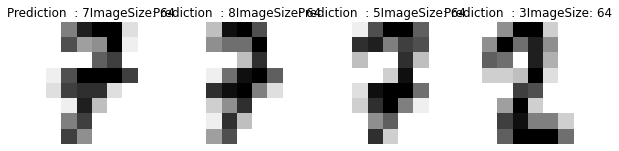

In [24]:
from PIL import Image
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    image_resized = resize(image, (int(image.shape[0] // 4), int(image.shape[1] // 2)),
                       anti_aliasing=True)
    


    ax.set_title(f"Prediction  : {prediction}" f"ImageSize: {image.size}")
    print("the image with the size" f"Prediction: {prediction}" f"image_resized :{image_resized}\n")

In [25]:
ac= df['Accuracy']
maximum = ac.max()
index = ac.idxmax()

print("The best test score is ", maximum," corresponding to hyperparameters gamma= ",pg[index]," C=",pc[index])

The best test score is  0.9555555555555556  corresponding to hyperparameters gamma=  0.001  C= 2


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.

